# Data based time series prediction

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from fbprophet.plot import plot_plotly
import numpy as np
import pylab
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Load the data

In [0]:
RKI_data = pd.read_csv('/content/drive/My Drive/week7_data_cases_rki.csv', index_col=[0], parse_dates= [0])
SIR_data = pd.read_csv('/content/drive/My Drive/week7_data_SIR_Data_5.csv', index_col=[0], parse_dates= [0])
ABM_data = pd.read_csv('/content/drive/My Drive/week7_data_cases_abm.csv', index_col=[0], parse_dates= [0])

RKI dataset

Get the mean, sd and critical values

In [0]:
type(RKI_data)

#convert to time series:
series_value = RKI_data.values
type(series_value)

RKI_data.describe()

,Cases
count,60.000000
mean,76819.266667
std,60165.075217
min,210.000000
25%,11771.500000
50%,77177.000000
75%,135395.000000
max,162395.000000


Plot the values

Making the time series stationary

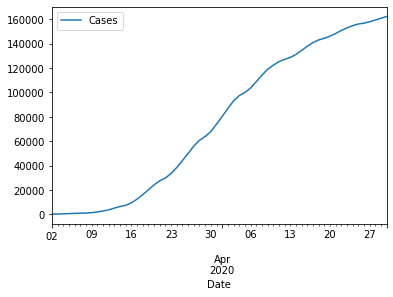

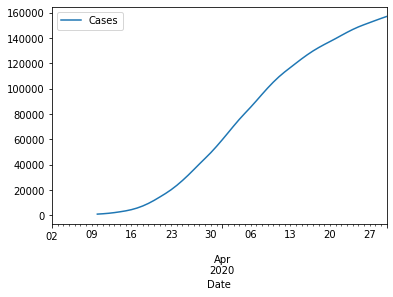

In [0]:
# Apply smoothing function
RKI_data_mean = RKI_data.rolling(window = 9).mean()
RKI_data.plot()
RKI_data_mean.plot()

ACF and PACF plots

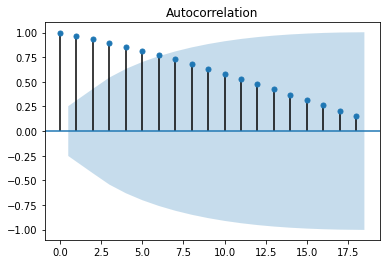

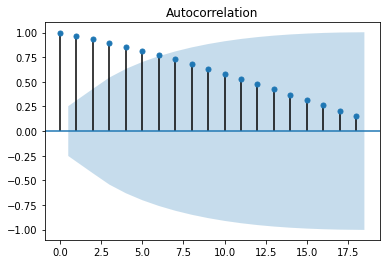

In [0]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(RKI_data)

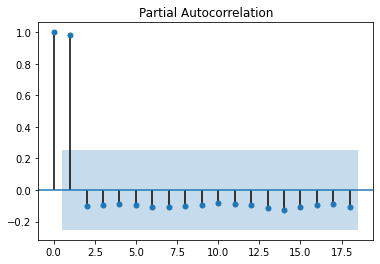

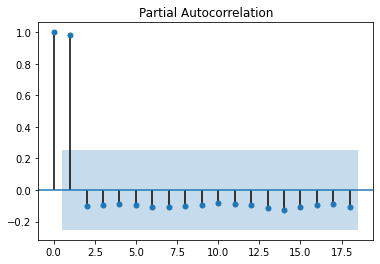

In [0]:
plot_pacf(RKI_data)

In [0]:
RKI_data.size

60

Split the data as train and test data

In [0]:
# Split data into train and test sets 
RKI_data_train = RKI_data[0:50]
RKI_data_test = RKI_data[50:60]

In [0]:
RKI_data_train.size

50

In [0]:
RKI_data_test.size

10

Build the ARIMA Model

In [0]:
from statsmodels.tsa.arima_model import ARIMA

RKI_data_model = ARIMA(RKI_data_train, order=(2,1,3))
RKI_data_model_fit = RKI_data_model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Get the best aic value

In [0]:
RKI_data_model_fit.aic

794.3582568029673

Predict the forecast

In [0]:
RKI_data_forecast = RKI_data_model_fit.forecast(steps = 10)[0]
RKI_data_forecast

array([148456.80211263, 150800.20175307, 153082.61798674, 155356.21409158,
       157631.76466883, 159911.30447419, 162195.03486191, 164482.78397694,
       166774.31474701, 169069.38916393])

In [0]:
RKI_data_test

,Cases
Date,
2020-04-21,148427
2020-04-22,150921
2020-04-23,153012
2020-04-24,154897
2020-04-25,156201
2020-04-26,156905
2020-04-27,158027
2020-04-28,159494
2020-04-29,160923


Find RMSE

In [0]:
# comparison to the best performing timeseries prediction approach
from sklearn.metrics import mean_squared_error
from math import sqrt
def rms(RKI_data_test, RKI_data_forecast):
  rms = sqrt(mean_squared_error(RKI_data_test, RKI_data_forecast))
  return rms
print("RMSE for fitting and prediction of RKI derived data")
print(rms(np.log(RKI_data_test), np.log(RKI_data_forecast)))


RMSE for fitting and prediction of RKI derived data
0.022309721214949417


Plot the forecast values

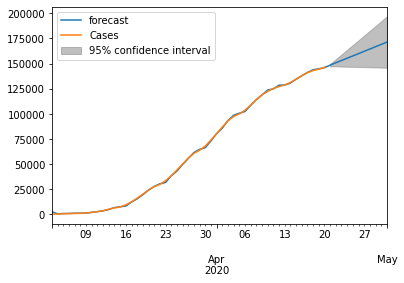

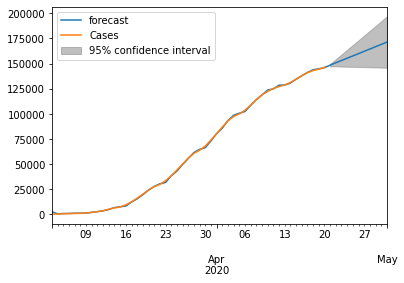

In [0]:
RKI_data_model_fit.plot_predict(1,60)

SIR dataset

In [0]:
type(SIR_data)

series_value = SIR_data.values
type(series_value)

SIR_data.describe()

,Cases
count,60.000000
mean,68981.400000
std,28544.016531
min,8500.000000
25%,50852.250000
50%,76365.000000
75%,92889.250000
max,103443.000000


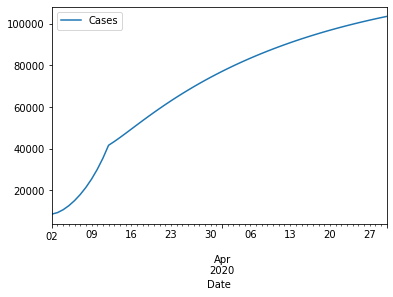

In [0]:
SIR_data.plot()

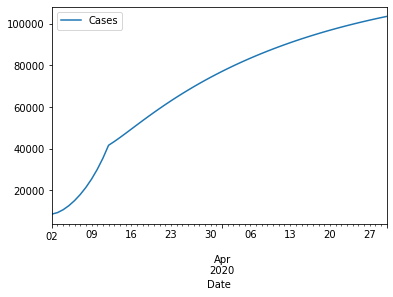

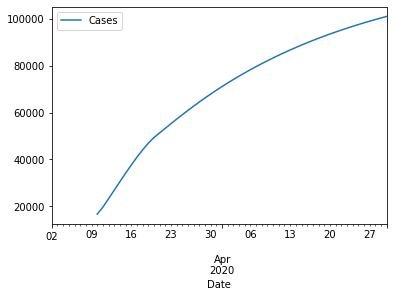

In [0]:
SIR_data_mean = SIR_data.rolling(window = 9).mean()
SIR_data.plot()
SIR_data_mean.plot()

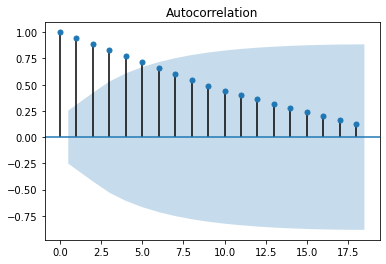

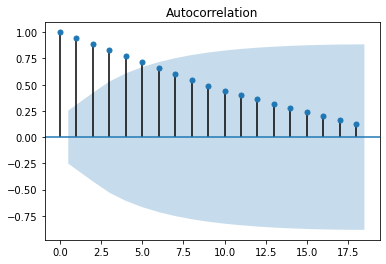

In [0]:
plot_acf(SIR_data)

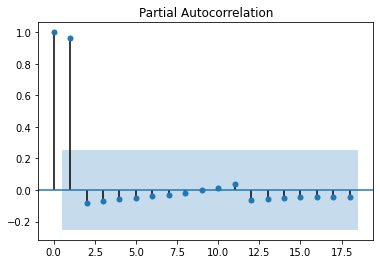

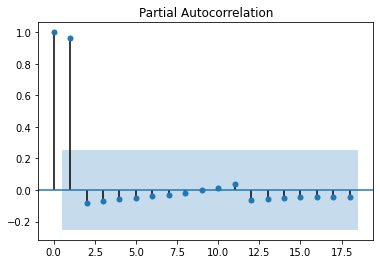

In [0]:
plot_pacf(SIR_data)

In [0]:
SIR_data_train = SIR_data[0:40]
SIR_data_test = SIR_data[40:60]

In [0]:
SIR_data_train.size

40

In [0]:
SIR_data_test.size

20

In [0]:
SIR_data_model = ARIMA(SIR_data_train, order=(2,1,2))
SIR_data_model_fit = SIR_data_model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669

In [0]:
SIR_data_model_fit.aic

636.6922735485527

In [0]:
SIR_data_forecast = SIR_data_model_fit.forecast(steps = 20)[0]
SIR_data_forecast

array([ 89225.21129156,  90880.75426221,  92770.08114116,  94855.1023643 ,
        97097.01951698,  99457.87226588, 101901.79110909, 104395.95997872,
       106911.30270967, 109422.91515288, 111910.27035389, 114357.22789107,
       116751.88037316, 119086.27046345, 121356.01087647, 123559.83783571,
       125699.12573607, 127777.38745743, 129799.78114093, 131772.64045873])

In [0]:
SIR_data_test

,Cases
Date,
2020-04-11,88865
2020-04-12,89860
2020-04-13,90825
2020-04-14,91761
2020-04-15,92669
2020-04-16,93550
2020-04-17,94405
2020-04-18,95234
2020-04-19,96038


In [0]:
def rms(SIR_data_test, SIR_data_forecast):
  rms = sqrt(mean_squared_error(SIR_data_test, SIR_data_forecast))
  return rms
print("RMSE for fitting and prediction of SIR derived data")
print(rms(np.log(SIR_data_test), np.log(SIR_data_forecast)))

RMSE for fitting and prediction of SIR derived data
0.14705460566192932


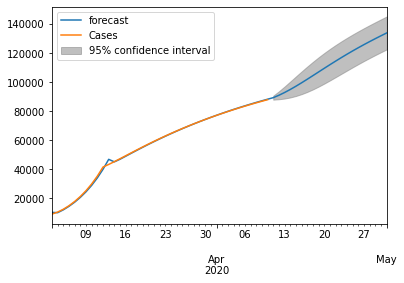

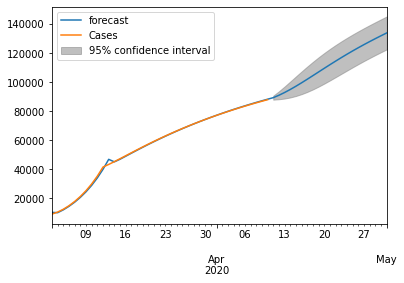

In [0]:
SIR_data_model_fit.plot_predict(1,60)

ABM dataset

In [0]:
type(ABM_data)

series_value = ABM_data.values
type(series_value)

ABM_data.describe()

,Cases
count,6.000000e+01
mean,2.470548e+07
std,1.748596e+07
min,2.455598e+06
25%,6.957530e+06
50%,2.097490e+07
75%,4.106307e+07
max,5.255663e+07


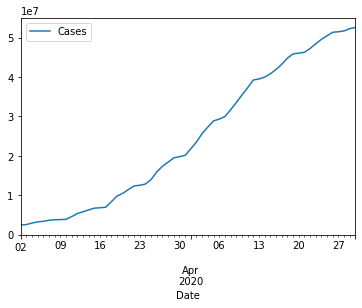

In [0]:
ABM_data.plot()

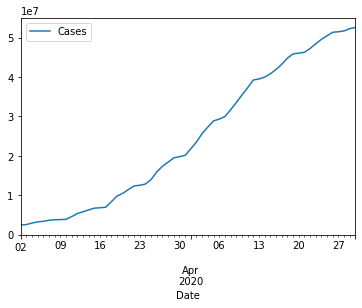

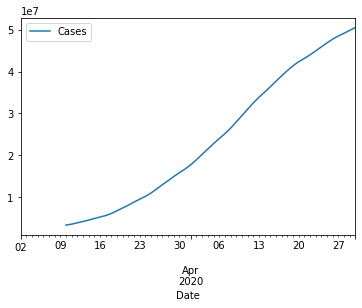

In [0]:
ABM_data_mean = ABM_data.rolling(window = 9).mean()
ABM_data.plot()
ABM_data_mean.plot()

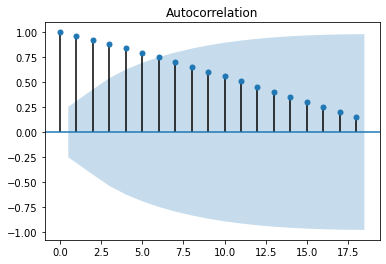

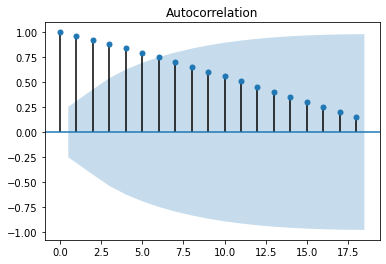

In [0]:
plot_acf(ABM_data)

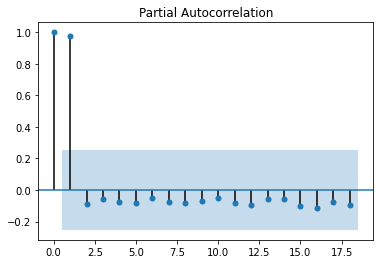

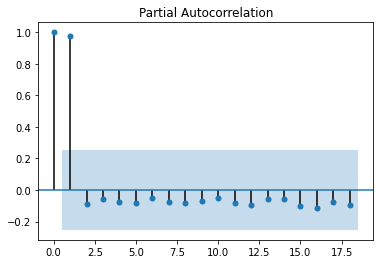

In [0]:
plot_pacf(ABM_data)

In [0]:
ABM_data.size

60

In [0]:
ABM_data_train = ABM_data[0:40]
ABM_data_test = ABM_data[40:60]

In [0]:
ABM_data_train.size

40

In [0]:
ABM_data_test.size

20

In [0]:
ABM_data_model = ARIMA(ABM_data_train, order=(2,1,3))
ABM_data_model_fit = ABM_data_model.fit()
ABM_data_model_fit.aic

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


1135.2076267739876

In [0]:
ABM_data_forecast = ABM_data_model_fit.forecast(steps = 20)[0]
ABM_data_forecast

array([37104610.45135316, 38191619.82880753, 38747841.58607563,
       39172444.00794392, 39832250.08181122, 40790721.99131725,
       41860636.81790528, 42831751.00778973, 43640028.17636962,
       44367951.53447101, 45132160.60443518, 45982416.14521031,
       46885730.92225643, 47779382.04112332, 48629043.66941016,
       49445664.59338624, 50261917.91521375, 51099834.3636168 ,
       51957434.5059684 , 52818277.75202215])

In [0]:
ABM_data_test

,Cases
Date,
2020-04-11,37243246
2020-04-12,39221367
2020-04-13,39494212
2020-04-14,39971689
2020-04-15,40790222
2020-04-16,41881599
2020-04-17,43177610
2020-04-18,44746464
2020-04-19,45837842


In [0]:
def rms(ABM_data_test, ABM_data_forecast):
  rms = sqrt(mean_squared_error(ABM_data_test, ABM_data_forecast))
  return rms
print("RMSE for fitting and prediction of ABM derived data")
print(rms(np.log(ABM_data_test), np.log(ABM_data_forecast)))

RMSE for fitting and prediction of ABM derived data
0.02868600995352859


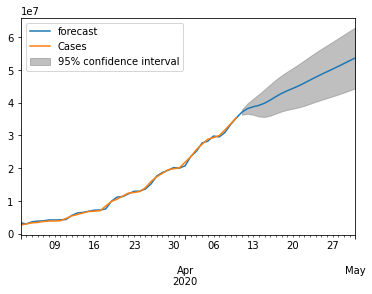

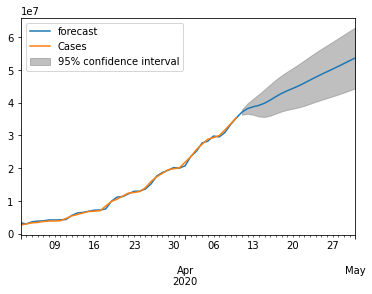

In [0]:
ABM_data_model_fit.plot_predict(1,60)

# PROPHET


In [0]:

def SIR_Data():return '/content/SIR_Data(6).csv'
def ABM_Data(): return '/content/cases_abm.csv'
def Real_Data(): return '/content/cases_rki.csv'

datasets = [Real_Data, SIR_Data, ABM_Data]


fig, axs = plt.subplots(1,3, figsize=(30, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i, datas in enumerate(datasets):
  data = pd.read_csv(datas(), index_col='Date',parse_dates=True)
  axs[i].plot(data.Cases)
  name = datas.__name__.replace('_', ' ')
  axs[i].set_title(f'# of Infected Cases for {name}')
  axs[i].set_ylabel('Cases')
  axs[i].set_xlabel('Days')

plt.tight_layout()
plt.show()
fig, axs = plt.subplots(3,2, figsize=(30, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
metrics = {"Data":[], "R2":[], "MSE":[], "RMSE":[]}
caps = [20,40,80]

for idx, data_path,cap in zip(range(0,2*len(datasets),2), datasets, caps):
  data = pd.read_csv(data_path(), index_col='Date',parse_dates=True)
  
  data['Cases'] = np.log(data['Cases'])
  name = data_path.__name__.replace('_', ' ')
  metrics['Data'].append(name)
  train = data[0:50]
  df_train = data[0:50].reset_index()
  df_train['cap'] = cap
  df_test = data[50:]
  df_train.rename(columns={"Date": "ds", "Cases": "y", 'Cases_per_Day':'Cases_per_Day'}, inplace = True)
  # take 50 days -> predict 10  
  m = Prophet( growth ='logistic', daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=False, changepoint_range=0.98).fit(df_train)
  future = m.make_future_dataframe(periods=10)
  future['cap'] = cap
  forecast = m.predict(future)
  

  forecast.set_index('ds', inplace=True)

  

  viz_df = train.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
  train.index = pd.to_datetime(train.index)
  connect_date = train.index[-2]

  mask = (forecast.index > connect_date)
  predict_df = forecast.loc[mask]
  viz_df = train.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
  
  axs[idx].plot(viz_df.Cases, label="Confirmed Cases")
  axs[idx].plot(viz_df.yhat, color='black', linestyle=':', label="Predicted Cases")
  axs[idx].fill_between(viz_df.index, (viz_df['yhat_upper']), (viz_df['yhat_lower']), alpha=0.5, color='darkgray')
  axs[idx].set_title(f'Prophet Prediction for {name}')
  # axs[idx].plot(data.Cases)
  # axs[idx].plot(forecast.yhat)
  axs[idx].set_ylabel('Cases')
  axs[idx].set_xlabel('Date')




  compare_df = df_test.join(forecast[['yhat']], how = 'outer').dropna()
  
  axs[idx+1].plot(compare_df['Cases'], c='r', label ='Confirmed Cases')
  axs[idx+1].plot(compare_df['yhat'], c='k', label ='Predicted Cases')
  axs[idx+1].set_title(f'Predicted vs Confirmed for {name}')
)

  print(mean_squared_error(compare_df.Cases, compare_df.yhat))
  metrics['R2'].append(r2_score(compare_df.Cases, compare_df.yhat))
  metrics['MSE'].append(mean_squared_error(compare_df.Cases, compare_df.yhat))
  metrics['RMSE'].append(mean_squared_error(compare_df.Cases, compare_df.yhat,squared=False))


plt.tight_layout()
plt.legend()
plt.show()

print(metrics)

# LSTM

In [0]:
sir_file = "/content/drive/My Drive/DataScience/Week7/SIR_Data_4.csv"
abm_file = "/content/drive/My Drive/DataScience/Week7/cases_abm.csv"
rki_file = "/content/drive/My Drive/DataScience/Week7/cases_rki.csv"
sir_df= pd.read_csv(sir_file, header=0, parse_dates=[0], index_col=0,squeeze=True)
sir_df = sir_df['Cases']

abm_df = pd.read_csv(abm_file, header=0, parse_dates=[0], index_col=0,squeeze=True)
rki_df = pd.read_csv(rki_file, header=0, parse_dates=[0], index_col=0,squeeze=True)


In [0]:

#BASED ON: https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

# frame a sequence as a supervised learning problem
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from pandas import concat
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 

In [0]:
# transform data to be stationary
raw_values = sir_df.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-10], supervised_values[-10:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Days=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


In [0]:
# report performance
rmse = sqrt(mean_squared_error(raw_values[-10:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-10:])
pyplot.plot(predictions)
pyplot.show()
sir_raw  = raw_values
sir_pred = predictions

In [0]:
# transform data to be stationary
raw_values = abm_df.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-10], supervised_values[-10:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Days=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))



In [0]:
# report performance
rmse = sqrt(mean_squared_error(raw_values[-10:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-10:])
pyplot.plot(predictions)
pyplot.show()
abm_raw  = raw_values
abm_pred = predictions

In [0]:
# transform data to be stationary
raw_values = rki_df.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-10], supervised_values[-10:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Days=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

In [0]:
# report performance
rmse = sqrt(mean_squared_error(raw_values[-10:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-10:])
pyplot.plot(predictions)
pyplot.show()
# report performance
rmse = sqrt(mean_squared_error(raw_values[-10:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-10:])
pyplot.plot(predictions)
pyplot.show()